In [1944]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [1945]:
#Uploading data lsitings data
lstngs= pd.read_csv("listings.csv")
#uploading calendar data
clndr= pd.read_csv("calendar.csv")
#uploading reviews data
rev= pd.read_csv("reviews.csv")

In [1946]:
#Exploring Listings data
lstngs.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [1947]:
rows=lstngs.shape[0]
columns= lstngs.shape[1]
print("Listings data has {} rows & {} columns".format(rows,columns))

Listings data has 3585 rows & 95 columns


In [1948]:
lstngs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [1949]:
#Data wrangling
lstngs=lstngs.dropna(how='all',axis=1)
lstngs.shape[1]# Dropped 4 columns with all null values

91

In [1950]:
#Checking the columns with more than 50% values missing
col=np.sum(np.sum(lstngs.isnull())/lstngs.shape[0]< 0.5)
col
#data= lstngs.isna().sum()>(3585*.8)
#data
#plt.plot(data)
#plt.show()

86

In [1951]:
#checking the number of columns with less than 10% values missing
'''col1=np.sum(np.sum(lstngs.isnull())/lstngs.shape[0]<0.1)
col1'''
col1=np.sum(np.sum(lstngs.isnull())/lstngs.shape[0]<0.1)
col1

61

In [1952]:
(lstngs['requires_license']=='t').sum()# seems to be non relevant column as none of the listings requires license

0

In [1953]:
lstngs['host_response_rate'].unique()# has %age values as entries. Most likely related with 'host_response_time', will drop this column

array([nan, '100%', '98%', '83%', '75%', '60%', '95%', '77%', '90%',
       '50%', '93%', '70%', '71%', '36%', '73%', '67%', '33%', '78%',
       '86%', '80%', '96%', '40%', '0%', '94%', '92%', '97%', '89%',
       '88%', '31%', '91%', '81%', '99%', '85%', '69%', '56%', '30%',
       '68%', '82%', '17%', '14%', '38%', '63%', '43%', '64%', '19%',
       '79%', '61%', '57%', '84%', '25%', '20%', '6%', '10%'],
      dtype=object)

In [1954]:
lstngs['host_response_rate']= lstngs['host_response_rate'].str.replace('[%,,]','')
lstngs['host_response_rate']= pd.to_numeric(lstngs['host_response_rate'])
lstngs['host_response_rate']

0         NaN
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
3580     96.0
3581     10.0
3582     78.0
3583    100.0
3584    100.0
Name: host_response_rate, Length: 3585, dtype: float64

In [1955]:
lstngs['host_acceptance_rate']= lstngs['host_acceptance_rate'].str.replace('[%,,]','')
lstngs['host_acceptance_rate']= pd.to_numeric(lstngs['host_acceptance_rate'])
lstngs['host_acceptance_rate']

0         NaN
1       100.0
2        88.0
3        50.0
4       100.0
        ...  
3580    100.0
3581     83.0
3582     50.0
3583     96.0
3584     95.0
Name: host_acceptance_rate, Length: 3585, dtype: float64

In [1956]:
(lstngs['host_is_superhost']=='t').sum()#407 have been listed as superhost listings

407

In [1957]:
t=(lstngs['host_has_profile_pic']=='t').sum()
print(" out of 3585 entries, {} entries have profile picture. ".format(t))

 out of 3585 entries, 3577 entries have profile picture. 


In [1958]:
#converting price related columns to numeric type from object type

lstngs['cleaning_fee']= lstngs['cleaning_fee'].str.replace('[$,,]','')
lstngs['cleaning_fee']= pd.to_numeric(lstngs['cleaning_fee'])
lstngs['price']= lstngs['price'].str.replace('[$,,]','')
lstngs['price']= pd.to_numeric(lstngs['price'])


In [1959]:
#Dropping rows with null values from 'City' column
lstngs=lstngs.dropna(subset=['city'])
lstngs.shape

(3583, 91)

In [1960]:
#Dropping columns with respect to partially missing entries 
fltrd_data=lstngs.drop(['listing_url','market','require_guest_profile_picture','latitude','longitude','country','host_total_listings_count','state','room_type','house_rules','smart_location','is_location_exact','id','host_verifications','host_location','smart_location','require_guest_phone_verification','experiences_offered','bed_type','notes','weekly_price','monthly_price','first_review','availability_30','last_review','country_code','street','zipcode','country_code','calendar_updated','extra_people','host_has_profile_pic','reviews_per_month','accommodates','neighbourhood','host_since','availability_90','availability_60','review_scores_rating','name','description','neighborhood_overview','host_about','host_url','host_name','host_listings_count','access','transit','review_scores_accuracy','interaction','neighbourhood_cleansed','space','requires_license','scrape_id','last_scraped','summary','thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url','host_picture_url','calendar_last_scraped'],axis=1)

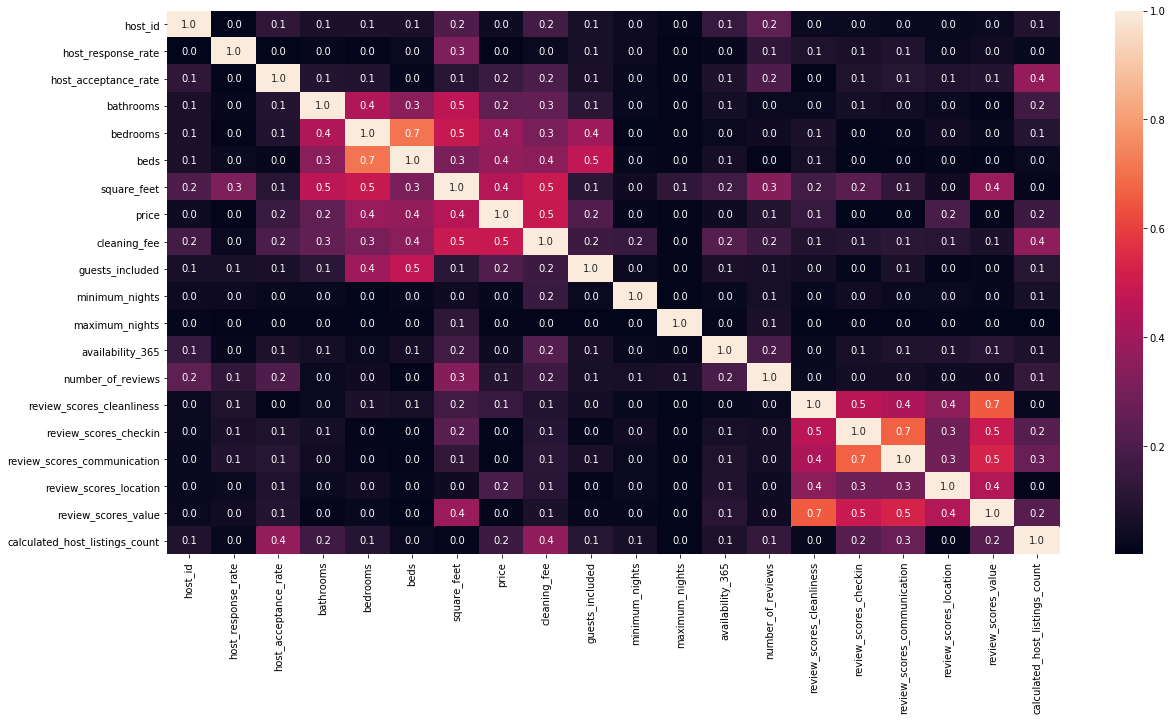

In [1961]:
plt.figure(figsize=(20,10))
ix = abs(fltrd_data.corr())
sns.heatmap(ix,annot=True,fmt='.1f')

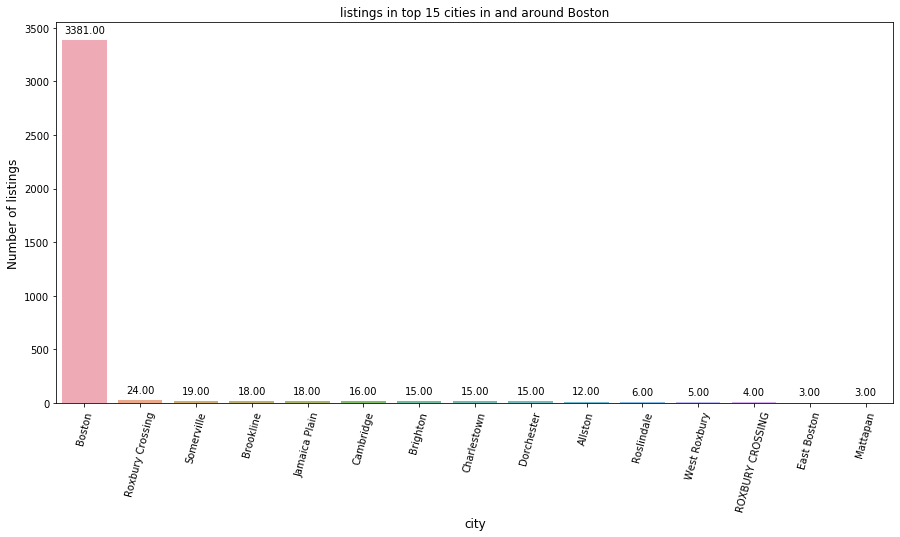

In [1962]:
#Exploring listings data in and around Boston
city_count  = lstngs['city'].value_counts()
city_count = city_count[:15,]
plt.figure(figsize=(15,7))
g=sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('listings in top 15 cities in and around Boston')
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=75)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

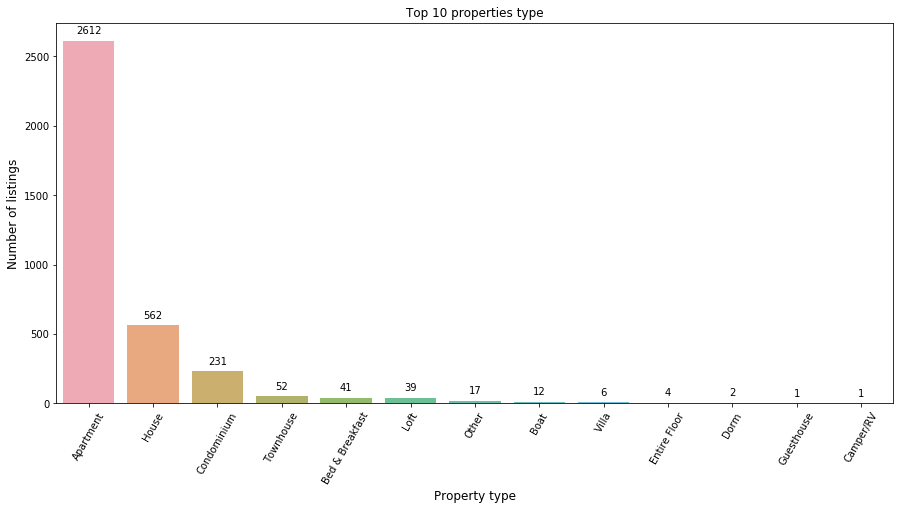

In [1963]:
#Exploring property_type data in and around Boston
property_type_count  = lstngs['property_type'].value_counts()[:20,]
plt.figure(figsize=(15,7))
g=sns.barplot(property_type_count.index, property_type_count.values, alpha=0.8)
plt.title('Top 10 properties type')
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Property type', fontsize=12)
plt.xticks(rotation=60)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/py

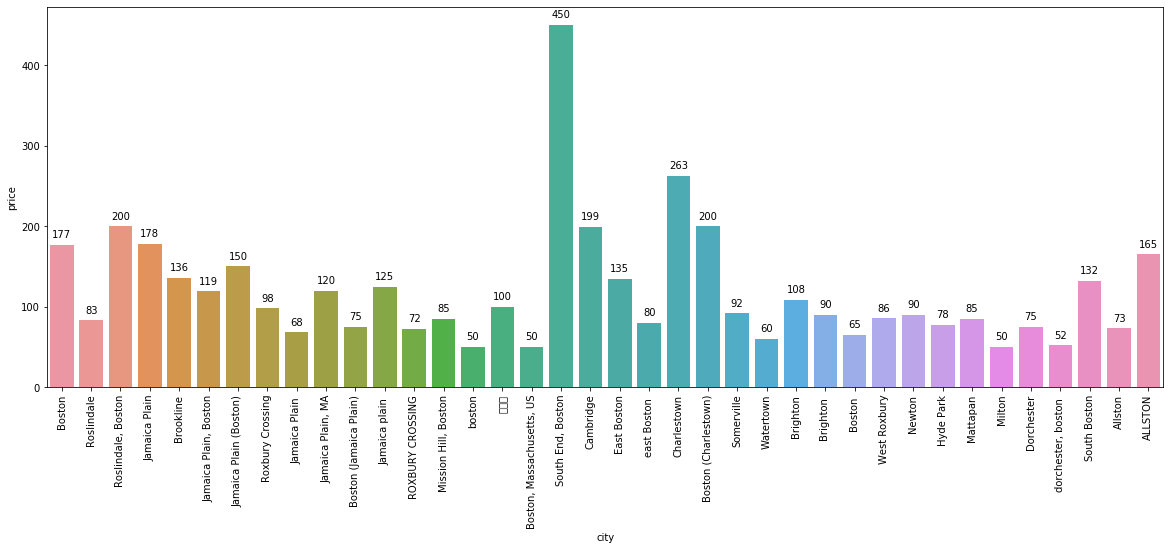

In [1964]:
#Checking the average pricing based on locality
plt.figure(figsize=(20,7))
g=sns.barplot(x='city',y='price',data=lstngs,ci=None)#ci=None for removing error bar line
plt.xticks(rotation=90)
for p in g.patches:# function for adding values at the tip of bar plots
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [1965]:
#Function for assigning the dummy columns and deleting the original columns in new dataframe
def create_dummy_df(df,cat_cols,dummy_na):
    for col in cat_cols:
        try:
            df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=dummy_na)],axis=1)
        except:
            continue
    return df 
col=lstngs[['host_response_time','host_is_superhost','city','host_identity_verified','property_type','instant_bookable','cancellation_policy']]
lstngs1=create_dummy_df(fltrd_data,col,dummy_na=True)

In [1966]:
#dropping rows with missing values in column 'review_scores_value'
lstngs1=lstngs1.dropna(subset=['review_scores_value'],axis=0)

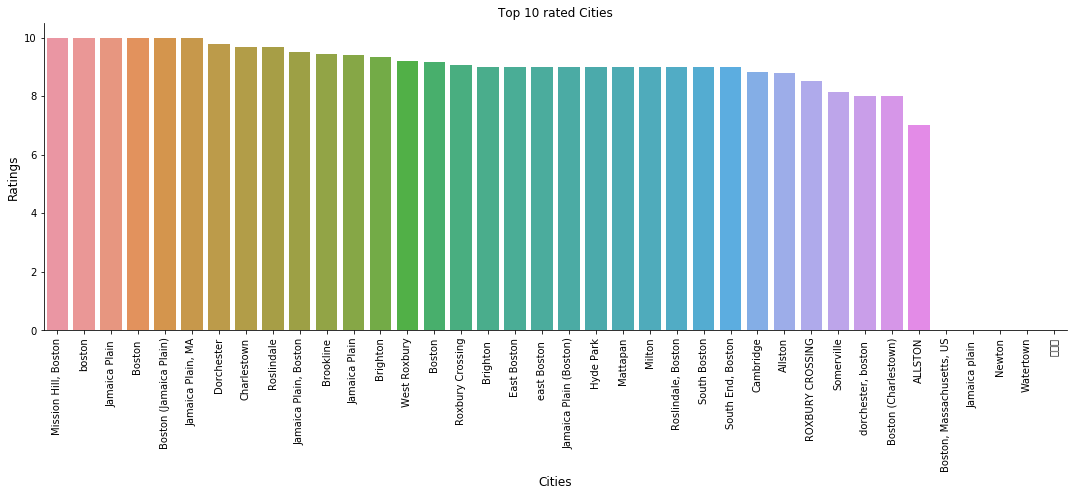

In [1967]:
#Plotting the top rated cities
plot_order = lstngs.groupby('city')['review_scores_value'].mean().sort_values(ascending=False).index.values
g=sns.catplot(x='city',y= 'review_scores_value', data= lstngs,aspect=3, kind='bar',ci=None, legend_out=False, order=plot_order)
plt.title('Top 10 rated Cities')
plt.ylabel('Ratings', fontsize=12)
plt.xlabel('Cities', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [1968]:
#finding the factors most related to Review scores.
iv = abs(lstngs1.corr())
cor_sort=iv.sort_values(by ='review_scores_value', ascending=False)
cor_sort['review_scores_value'][:10,]

review_scores_value                    1.000000
review_scores_cleanliness              0.653961
review_scores_communication            0.529563
review_scores_checkin                  0.494320
review_scores_location                 0.440075
square_feet                            0.384738
calculated_host_listings_count         0.225952
host_is_superhost_t                    0.222912
availability_365                       0.108395
cancellation_policy_super_strict_30    0.098423
Name: review_scores_value, dtype: float64

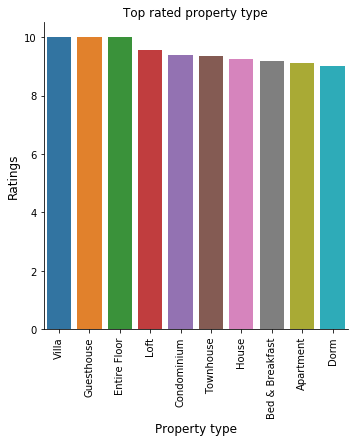

In [1969]:
#plotting the Top rated Property Type
plot_order = (lstngs.groupby('property_type')['review_scores_value'].mean().sort_values(ascending=False).index.values)[:10,]
g=sns.catplot(x='property_type',y= 'review_scores_value', data= lstngs,aspect=1, kind='bar',ci=None, legend_out=False, order=plot_order)#increase aspect=XX in code to increase spacing between the bars 
plt.title('Top rated property type')
plt.ylabel('Ratings', fontsize=12)
plt.xlabel('Property type', fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [1970]:
# Feature screening for model building
f_interest=lstngs1.drop(['host_is_superhost_nan','city_nan','host_response_time_nan','property_type_nan','bathrooms','host_id','security_deposit','square_feet','beds','host_neighbourhood','cleaning_fee','amenities','host_identity_verified_nan','instant_bookable_nan','cancellation_policy_nan'],axis=1)
f_interest=f_interest.dropna(subset=['bedrooms','host_response_rate','review_scores_communication','review_scores_location','review_scores_checkin'])

In [1971]:
f_interest.info()# Checking the count of non-null entries and data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 1 to 3583
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_response_rate                     2534 non-null   float64
 1   host_acceptance_rate                   2534 non-null   float64
 2   bedrooms                               2534 non-null   float64
 3   price                                  2534 non-null   float64
 4   guests_included                        2534 non-null   int64  
 5   minimum_nights                         2534 non-null   int64  
 6   maximum_nights                         2534 non-null   int64  
 7   availability_365                       2534 non-null   int64  
 8   number_of_reviews                      2534 non-null   int64  
 9   review_scores_cleanliness              2534 non-null   float64
 10  review_scores_checkin                  2534 non-null   float64
 11  revi

In [1972]:
f_interest.columns

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_t',
       'city_Allston', 'city_Boston', 'city_Boston ',
       'city_Boston (Charlestown)', 'city_Boston (Jamaica Plain)',
       'city_Boston, Massachusetts, US', 'city_Brighton', 'city_Brighton ',
       'city_Brookline', 'city_Cambridge', 'city_Charlestown',
       'city_Dorchester', 'city_East Boston', 'city_Hyde Park',
       'city_Jamaica Plain', 'city_Jamaica Plain ',
       'city_Jamaica Plain (Boston)', 'city_Jamaica Plain, Boston',
       'city_Jamaica Plain, MA', 

In [1973]:
#importing libraries for linear regressiong modelling
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1974]:
#preparing the predictor variables
X=f_interest.drop(['price'],axis=1)
y=f_interest['price']

In [1975]:
#Splitting data in Train & Test
X_train,X_test,y_train,y_test= train_test_split(X, y, train_size=0.8, random_state=42)

In [1976]:
#Training the model for Linear Regression 
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.4189630283635306

In [1977]:
#importing libraries for linear regressiong modelling
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=42)

In [1978]:
#Training the model for Randomforest regression
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.5503007357915103

In [1979]:
#Random Forest regression model is performing better than Linear Regression model. Will consider Random Forest Model for further evaluation

In [1980]:
#Feature importance list
import pandas as pd
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(15)

,importance
bedrooms,0.416308
availability_365,0.086854
calculated_host_listings_count,0.072168
number_of_reviews,0.061643
minimum_nights,0.056825
review_scores_location,0.053249
host_acceptance_rate,0.041582
guests_included,0.030255
maximum_nights,0.019929
property_type_House,0.018500


Text(0, 0.5, 'Importance value')

/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/farazrahman/opt/anaconda3/lib/py

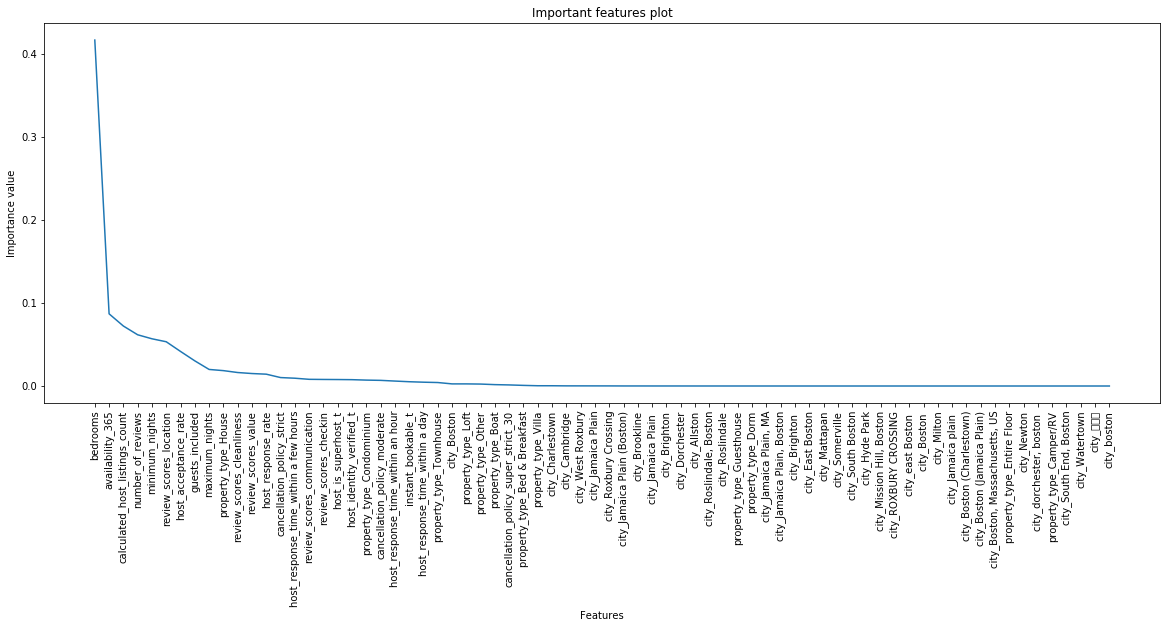

In [1981]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.plot(feature_importances)
plt.title("Important features plot")
plt.xlabel("Features")
plt.ylabel("Importance value")



In [1982]:
#Training the model with top listed important features for prediction
X_mod= X[['bedrooms','availability_365','minimum_nights','calculated_host_listings_count','review_scores_location','number_of_reviews','host_acceptance_rate','guests_included','maximum_nights','property_type_House','host_response_rate','cancellation_policy_strict','host_response_time_within a few hours','review_scores_cleanliness','review_scores_value',]]
X_train,X_test,y_train,y_test= train_test_split(X_mod, y, train_size=0.8, random_state=20)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("The R Squared Value of RandomForest regression model is {}".format(r_squared))

The R Squared Value of RandomForest regression model is 0.6054594236349844
